In [92]:
import openbabel
import molSimplify
import numpy as np
import pandas as pd
import os
from os.path import exists
from rdkit import Chem
from rdkit.Chem import Descriptors
from mordred import Calculator, descriptors
from openbabel import pybel
from molSimplify.Informatics.lacRACAssemble import generate_full_complex_autocorrelations as gfca
from molSimplify.Informatics.lacRACAssemble import autocorrelation
from molSimplify.Informatics.lacRACAssemble import deltametric
#use these to generate featureset
#identify by USD Code
from molSimplify.Informatics.lacRACAssemble import generate_metal_autocorrelations as gma
from molSimplify.Informatics.lacRACAssemble import generate_metal_deltametrics as gmd

from molSimplify.Classes.mol3D import*
#easiest thing might be to just take one xyz and then form proper panda dataframe
#then it will be easier to know how to add rest of data for 200+ molecules 

In [93]:
from AaronTools.fileIO import FileReader
from AaronTools.finders import WithinRadiusFromAtom, BondedElements
from AaronTools.geometry import Geometry
from AaronTools.utils.utils import glob_files

In [94]:
#Create dataframe to store gaussian generated features
import pandas as pd

gaussian_feats = pd.DataFrame()
print(gaussian_feats)

Empty DataFrame
Columns: []
Index: []


In [95]:
#Trying to identify which file's don't get turned into rdkit objects properly
file_path = "/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/"
mols_mordred = []

# Assuming you have a list of file names defined as 'file_names'
for f in file_names:
    new_file_path = os.path.splitext(file_path + f)[0] + '.mol'
    mol = Chem.MolFromMolFile(new_file_path, sanitize=True)
    mols_mordred.append(mol)

calc = Calculator(descriptors, ignore_3D=False)

valid_mols = []
invalid_file_paths = []

for f, mol in zip(file_names, mols_mordred):
    if mol is not None:
        valid_mols.append(mol)
    else:
        invalid_file_paths.append(os.path.splitext(file_path + f)[0] + '.mol')

df = calc.pandas(valid_mols)
df["mol id"] = valid_mols

print("NUMBER OF VALID MOLSIMPLIFY OBJS")
print(len(valid_mols))
print("Invalid file paths:", invalid_file_paths)
print(df)


[14:27:15] Explicit valence for atom # 11 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 5 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 5 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 6 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 4 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 2 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 5 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 5 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 8 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 6 B, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 4 N, 4, is greater than permitted
[14:27:15] Explicit valence for atom # 21 N, 4, is

/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  5%|██                                        | 12/252 [00:06<00:45,  5.25it/s]

/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  8%|███▌                                      | 21/252 [00:07<00:30,  7.50it/s]

/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 10%|████                                      | 24/252 [00:07<00:31,  7.24it/s]

/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 12%|█████▏                                    | 31/252 [00:08<00:33,  6.56it/s]

/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 20%|████████▎                                 | 50/252 [00:11<00:28,  7.03it/s]

/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 30%|████████████▋                             | 76/252 [00:15<00:24,  7.15it/s]

/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 44%|██████████████████▏                      | 112/252 [00:20<00:20,  6.85it/s]

/Users/drewhartsfield/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|█████████████████████████████████████████| 252/252 [00:37<00:00,  6.80it/s]

NUMBER OF VALID MOLSIMPLIFY OBJS
252
Invalid file paths: ['/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/file_4.mol', '/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/file_63.mol', '/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/file_76.mol', '/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/file_90.mol', '/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/file_101.mol', '/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/file_115.mol', '/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/file_117.mol', '/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/file_137.mol', '/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemo

In [96]:
from AaronTools.geometry import Geometry
from AaronTools.finders import BondedTo


file_path = "/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/"
file_list = []

for i in range(2, 499):
    filename = "file_" + str(i) + ".log"
    file_full_path = os.path.join(file_path, filename)
    
    if os.path.exists(file_full_path):
        file_list.append(file_full_path)
print("NUMBER OF FILES:")
print(len(file_list))

#Find the distance between the Palladium and Phosphine
M_P_dist = []
file_names = []
for f in file_list:
    # refresh_ranks=False will make this faster, as we don't need
    # ranks to find indices
    geom = Geometry(f, refresh_ranks=False)
    # find returns a list of Atom objects
    # I'm assuming there's only one Pd
    Pd = geom.find("Pd")[0]
    # if all P atoms are bonded to Pd, you can just use the
    # element symbol instead of BondedTo
    # there's more 'finders' documented here: https://aarontools.readthedocs.io/en/latest/api/finders.html 
    P_atoms = geom.find("P", BondedTo(Pd))
    Pd_ndx = geom.atoms.index(Pd)
    if len(P_atoms) == 1:
        file_names.append(os.path.basename(f))
        M_P_dist.append(Pd.dist(P_atoms[0]))
                        
print("NUMBER OF MONO PPH3:")
print(len(M_P_dist))   
# print(M_P_dist)
# print(file_names)
gaussian_feats["file_names"] = file_names
gaussian_feats["M-P Distance"] = M_P_dist
print(gaussian_feats)

NUMBER OF FILES:
490
NUMBER OF MONO PPH3:
288
       file_names  M-P Distance
0      file_2.log      2.335587
1      file_3.log      2.322004
2      file_4.log      2.279662
3      file_8.log      2.297092
4      file_9.log      2.321698
..            ...           ...
283  file_492.log      2.359158
284  file_494.log      2.275222
285  file_495.log      2.309978
286  file_496.log      2.300993
287  file_497.log      2.368634

[288 rows x 2 columns]


In [97]:
# from rdkit import Chem
# from rdkit.Chem import Descriptors
# from mordred import Calculator, descriptors
# from openbabel import pybel
# from molSimplify.Informatics.lacRACAssemble import generate_full_complex_autocorrelations as gfca
# from molSimplify.Informatics.lacRACAssemble import autocorrelation
# from molSimplify.Informatics.lacRACAssemble import deltametric
# #use these to generate featureset
# #identify by USD Code
# from molSimplify.Informatics.lacRACAssemble import generate_metal_autocorrelations as gma
# from molSimplify.Informatics.lacRACAssemble import generate_metal_deltametrics as gmd

# from molSimplify.Classes.mol3D import*

# file_path = "/Users/drewhartsfield/PycharmProjects/PPh3-Pd_SORTER/DFTProcessing/notRemovedDFTSuccess_copy/"

# mols_mordred = []
# for f in file_names:
# #     print(f)
#     new_file_path = os.path.splitext(file_path + f)[0] + '.mol'
# #     print(new_file_path)
#     mol = Chem.MolFromMolFile(new_file_path, sanitize=True)
#     mols_mordred.append(mol)

    
# calc = Calculator(descriptors, ignore_3D=False)
# print(len(mols_mordred))
# valid_mols = [mol for mol in mols_mordred if mol is not None]
# invalid_mols = [mol for mol in mols]
# df = calc.pandas(valid_mols)
# df["mol id"] = valid_mols
# print("NUMBER OF VALID MOLSIMPLIFY OBJS")
# print(len(valid_mols))
# print(df)

In [98]:


# SCRIPT TO TAKE A METAL-METHYL COMPLEX LOG FILE AND FIND THE FREQUENCY CORRESPONDING TO THE MOST BOND MOTION ("BOND FREQUENCY")
# Written by Jugal at some point, adapted by Spencer Ricks 8/14/2023

import argparse

from AaronTools.fileIO import FileReader
from AaronTools.finders import WithinRadiusFromAtom, BondedElements
from AaronTools.geometry import Geometry
from AaronTools.utils.utils import glob_files

frc_constants = []
frequencies = []
Pd_charges = []
P_charges = []
#Remember that we're only grabbing files with mono PPh3
for f in file_names:
    full_file_path = file_path + f
    fr = FileReader(full_file_path, just_geom=False)
    geom = Geometry(fr, refresh_ranks=False, refresh_connected=True)
    Pd = geom.find("Pd")[0]
    Pd_index = geom.atoms.index(Pd)
    Pd_charge = fr["Mulliken Charges"][Pd_ndx]
    Pd_charges.append(Pd_charge)
    
    P = geom.find(
        "P",
        WithinRadiusFromAtom(Pd, 2.5),
    )[0]
    
#     else:
#         P = geom.find(args.carbon)[0]
    P_index = geom.atoms.index(P)
    P_charge = fr["Mulliken Charges"][P_index]
    P_charges.append(P_charge)
    strech =np.zeros((len(fr.atoms),3))
    strech[geom.atoms.index(Pd)]=Pd.bond(P)
    strech[geom.atoms.index(P)]=P.bond(Pd)
    freq= fr["frequency"]
    mass=np.array([np.sqrt(a.mass) for a in geom.atoms])
    best_overlap = None
    best_mode = None
    for mode in freq.data:
        disp =mode.vector
        disp*=mass[:,np.newaxis]
        overlap=abs(np.sum(disp * strech))
        if best_overlap is None or overlap > best_overlap:
            best_overlap = overlap
            best_mode = mode

    #print(f, best_mode.frequency)
#     print(best_mode.frequency)
    frequencies.append(best_mode.frequency)
    
#harmonicvibration
#parse_gaussian_lines
print("number of frequencies:")
print(len(frequencies))
gaussian_feats["frequencies"] = frequencies
gaussian_feats["Pd Charges"] = Pd_charges
gaussian_feats["P Charges"] = P_charges
print(gaussian_feats)



number of frequencies:
288
       file_names  M-P Distance  frequencies  Pd Charges  P Charges
0      file_2.log      2.335587     441.3224    0.145934   0.374562
1      file_3.log      2.322004     533.4963    0.156615   0.376504
2      file_4.log      2.279662     538.0357   -0.035276   0.406953
3      file_8.log      2.297092     536.7830   -0.097865   0.333561
4      file_9.log      2.321698     438.6867   -0.005311   0.397099
..            ...           ...          ...         ...        ...
283  file_492.log      2.359158     435.4185   -0.116444   0.367138
284  file_494.log      2.275222     538.4829   -0.135472   0.374371
285  file_495.log      2.309978     536.3384    0.212917   0.365079
286  file_496.log      2.300993     537.9040   -0.034927   0.378455
287  file_497.log      2.368634     195.4835   -0.272213   0.375221

[288 rows x 5 columns]


In [99]:
#Trying to grab force constant
file_number = 0
frc_constants = []
for f in file_names:
    full_file_path = file_path + f
    with open(full_file_path, 'r') as file:
        lines = file.readlines()

    target_line_number = None
    for line_number, line in enumerate(lines):
        if str(frequencies[file_number]) in line:
            file_number += 1
            target_line_number = line_number
            break
    if target_line_number is None or target_line_number + 2 >= len(lines):
        print("not found") #Case where frequency isn't found or file ends

    force_constant_line = lines[target_line_number + 2]
#     print(force_constant_line)
#     print(force_constant_line.split()[5])
    frc_constants.append(force_constant_line.split()[5])

#add data to pandas df
gaussian_feats["frc_constants"] = frc_constants
print(len(frc_constants))
print(gaussian_feats)

288
       file_names  M-P Distance  frequencies  Pd Charges  P Charges  \
0      file_2.log      2.335587     441.3224    0.145934   0.374562   
1      file_3.log      2.322004     533.4963    0.156615   0.376504   
2      file_4.log      2.279662     538.0357   -0.035276   0.406953   
3      file_8.log      2.297092     536.7830   -0.097865   0.333561   
4      file_9.log      2.321698     438.6867   -0.005311   0.397099   
..            ...           ...          ...         ...        ...   
283  file_492.log      2.359158     435.4185   -0.116444   0.367138   
284  file_494.log      2.275222     538.4829   -0.135472   0.374371   
285  file_495.log      2.309978     536.3384    0.212917   0.365079   
286  file_496.log      2.300993     537.9040   -0.034927   0.378455   
287  file_497.log      2.368634     195.4835   -0.272213   0.375221   

    frc_constants  
0          0.6244  
1          1.3289  
2          0.8101  
3          0.9455  
4          0.4827  
..            ...  
283

In [100]:
# Load the coordEnergy DataFrame and assume gaussian_feats is defined
coordEnergy = pd.read_excel('/Users/drewhartsfield/Desktop/Ess Work/DFT/EssProperDFTValues.xlsx', sheet_name="Energies")

# Initialize the list to store coordination energies
coord_energies = []

# Iterate through file names and find corresponding coordination energies
for f in gaussian_feats["file_names"]:
    row_index = coordEnergy.index[coordEnergy['FileName'] == f].tolist()
    if row_index:
        # Extract the specific value and append it to the list
        coordination_energy = coordEnergy.at[row_index[0], 'CoordinationEnergy']
#         print(coordination_energy)  # Print the value only
        coord_energies.append(coordination_energy)
    else:
        print(f"File name '{f}' not found in coordEnergy.")

print(len(coord_energies))

# Now you can assign coord_energies to your DataFrame
gaussian_feats['Coordination Energy'] = coord_energies


288


In [101]:
gaussian_feats["frc_constants"] = gaussian_feats["frc_constants"].astype(float)
print(gaussian_feats)


       file_names  M-P Distance  frequencies  Pd Charges  P Charges  \
0      file_2.log      2.335587     441.3224    0.145934   0.374562   
1      file_3.log      2.322004     533.4963    0.156615   0.376504   
2      file_4.log      2.279662     538.0357   -0.035276   0.406953   
3      file_8.log      2.297092     536.7830   -0.097865   0.333561   
4      file_9.log      2.321698     438.6867   -0.005311   0.397099   
..            ...           ...          ...         ...        ...   
283  file_492.log      2.359158     435.4185   -0.116444   0.367138   
284  file_494.log      2.275222     538.4829   -0.135472   0.374371   
285  file_495.log      2.309978     536.3384    0.212917   0.365079   
286  file_496.log      2.300993     537.9040   -0.034927   0.378455   
287  file_497.log      2.368634     195.4835   -0.272213   0.375221   

     frc_constants  Coordination Energy  
0           0.6244            39.906467  
1           1.3289            48.879853  
2           0.8101   

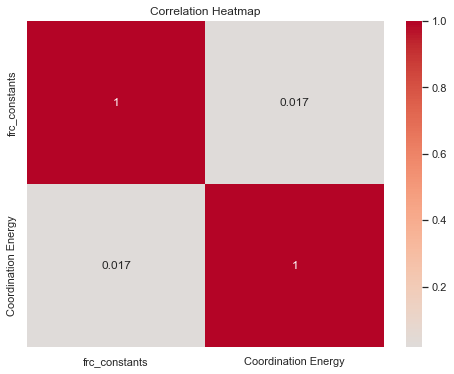

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df and you want to visualize the correlation between 'column1' and 'column2'
# df = ...

# Calculate the correlation matrix
correlation_matrix = gaussian_feats[['frc_constants', 'Coordination Energy']].corr()

# Create a heatmap using Seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title and show the plot
plt.title("Correlation Heatmap")
plt.show()


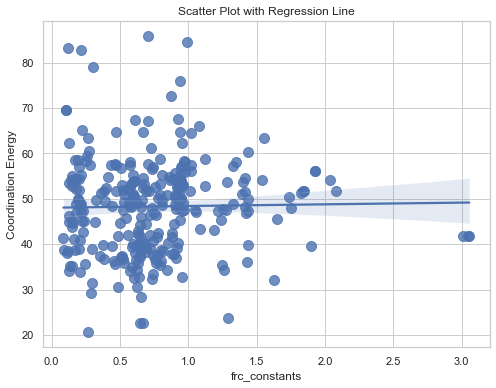

In [103]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(data=gaussian_feats, x='frc_constants', y='Coordination Energy', scatter_kws={'s': 100})
plt.xlabel('frc_constants')
plt.ylabel('Coordination Energy')
plt.title('Scatter Plot with Regression Line')
plt.show()

In [107]:
y = gaussian_feats[['Coordination Energy']]
print(y)

X = gaussian_feats.drop(['Coordination Energy','file_names'], axis = 1)
print(X)

     Coordination Energy
0              39.906467
1              48.879853
2              55.342573
3              55.647542
4              30.648191
..                   ...
283            44.322251
284            55.222719
285            65.955641
286            41.516029
287            41.127600

[288 rows x 1 columns]
     M-P Distance  frequencies  Pd Charges  P Charges  frc_constants
0        2.335587     441.3224    0.145934   0.374562         0.6244
1        2.322004     533.4963    0.156615   0.376504         1.3289
2        2.279662     538.0357   -0.035276   0.406953         0.8101
3        2.297092     536.7830   -0.097865   0.333561         0.9455
4        2.321698     438.6867   -0.005311   0.397099         0.4827
..            ...          ...         ...        ...            ...
283      2.359158     435.4185   -0.116444   0.367138         0.6469
284      2.275222     538.4829   -0.135472   0.374371         0.5986
285      2.309978     536.3384    0.212917   0.365079  

In [106]:
print(f'X : {X.shape}')
print(f'y : {y.shape}')
print(y.head())

X : (288, 5)
y : (288, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [129]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=101)
print(y_train)
from sklearn.preprocessing import MinMaxScaler

# Normalization done here
#Tried MinMaxScaler and StandardScaler
scaler = MinMaxScaler()
normalized_X_train = scaler.fit_transfform(X_train)
normalizied_X_test = scaler.fit_transform(X_test)
normalized_y_train = scaler.fit_transform(y_train)
normalized_y_test = scaler.fit_transform(y_test)
print("x training set")
print(normalized_X_train)

     Coordination Energy
56             48.173277
158            35.059583
264            69.597706
178            48.138136
74             56.080524
..                   ...
40             35.477505
75             72.554531
87             37.590957
63             39.046779
11             35.278584

[230 rows x 1 columns]
x training set
[[0.3885014  0.97927608 0.88898628 0.50695122 0.45237361]
 [0.32881944 0.74946344 0.63361728 0.61009368 0.16877464]
 [0.45020772 0.04644299 0.72076926 0.58416397 0.00411311]
 ...
 [0.28704445 0.76052109 0.69810983 0.72700025 0.19053985]
 [0.46436089 0.20880798 0.3290236  0.42298322 0.03739503]
 [0.75568112 0.         0.55289557 0.47664866 0.01316195]]


In [130]:
from sklearn.ensemble import RandomForestRegressor as RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, mutual_info_regression

from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [131]:
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {normalized_y_test.shape}')

X_train : (230, 5)
X_test : (58, 5)
y_train : (230, 1)
y_test : (58, 1)


In [132]:
model = RandomForestRegressor(bootstrap = True, n_estimators = 1000, criterion = 'mse',max_depth = None, random_state = 101, n_jobs = -1)

In [133]:
model.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=101)

In [134]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_test)

In [135]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
R2_train = r2_score(y_train, y_train_pred)
MSE_valid = mean_squared_error(y_test, y_valid_pred)
MAE_valid = mean_absolute_error(y_test, y_valid_pred)
R2_valid = r2_score(y_test, y_valid_pred)
print("MAE_train=", MAE_train)
print("MAE_valid=", MAE_valid)
print("R2_train=", R2_train)
print("R2_valid=", R2_valid)
plt.figure()

MAE_train= 2.327152186912928
MAE_valid= 6.788801508455528
R2_train= 0.8937900220518259
R2_valid= 0.24026158597394576


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#scifinder tool 
#normalization
#Frc constant
#bond orders (NBO)